# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

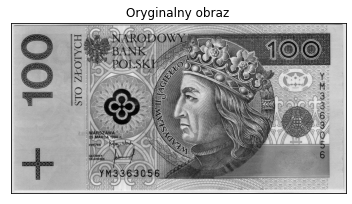

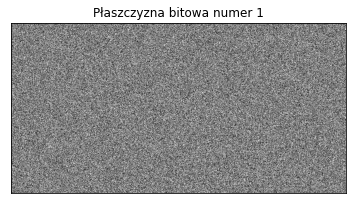

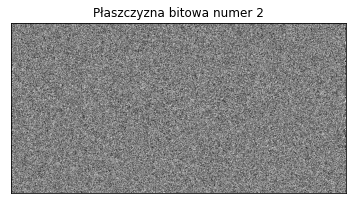

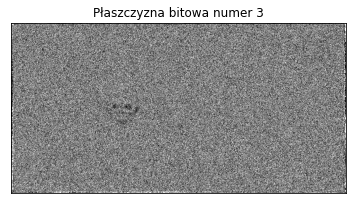

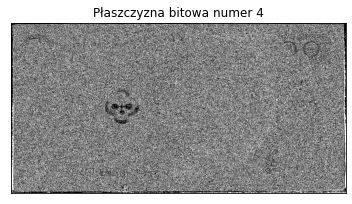

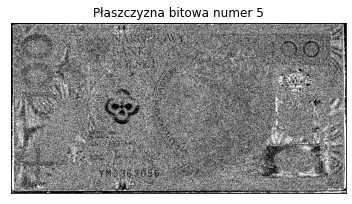

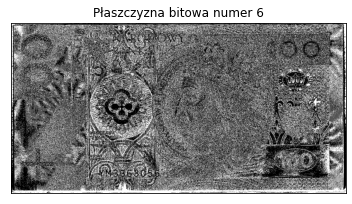

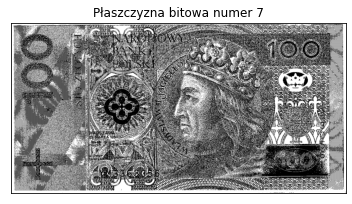

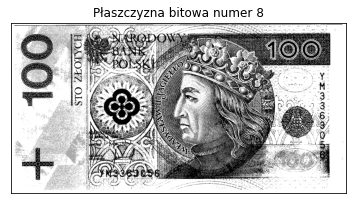

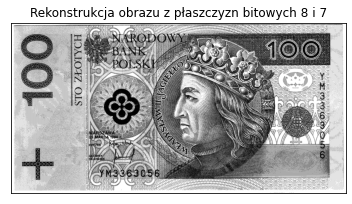

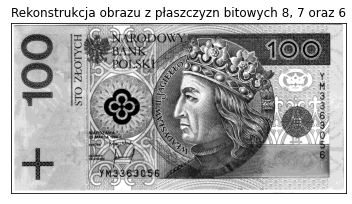

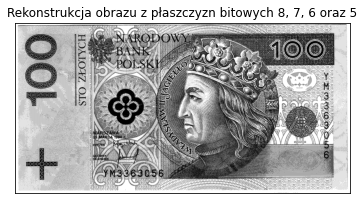

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

if not os.path.exists("100zloty.jpg"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg

bill_color = cv2.imread("100zloty.jpg")
bill_gray = cv2.cvtColor(bill_color, cv2.COLOR_RGB2GRAY)

plt.imshow(bill_gray)
plt.title("Oryginalny obraz")
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

bit_images = []

bit_number = 1

for bit in [2 ** x for x in range(8)]:
    # tworzymy po kolei "tablice"
    bit_value = (bit * np.ones(bill_gray.shape)).astype("uint8")

    # tutaj dokonujemy bit-plane-slicing
    bit_image = cv2.bitwise_and(bill_gray, bit_value)
    bit_images.append(bit_image)

    plt.imshow(bit_image)
    plt.title("Płaszczyzna bitowa numer {}".format(bit_number))
    plt.xticks([])
    plt.yticks([])
    plt.gray()
    plt.show()

    bit_number = bit_number + 1

# rekonstrukcja obrazów

add_img_1 = cv2.add(bit_images[7], bit_images[6])
add_img_2 = cv2.add(bit_images[7], bit_images[6], bit_images[5])
add_img_3 = cv2.add(bit_images[7], bit_images[6], bit_images[5], bit_images[4])

plt.imshow(add_img_1)
plt.title("Rekonstrukcja obrazu z płaszczyzn bitowych 8 i 7")
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

plt.imshow(add_img_2)
plt.title("Rekonstrukcja obrazu z płaszczyzn bitowych 8, 7 oraz 6")
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

plt.imshow(add_img_3)
plt.title("Rekonstrukcja obrazu z płaszczyzn bitowych 8, 7, 6 oraz 5")
plt.xticks([])
plt.yticks([])
plt.gray()
plt.show()

# Możemy wyciągnąć wniosek, że najbardziej znaczący bit przechowuje najwięcej informacji dotyczących obrazu.
# Dzięki obcinaniu mniej znaczących bitów możemy dokonać pewnego rodzaju kompresji. Obraz składający się z
# 4 pierwszych najbardziej znaczących bitów posiada w miarę akceptowalną jakość.

